<a href="https://colab.research.google.com/github/FreeeSoul/realFastCampus/blob/main/3_ch2_4~5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Mount Drive

In [2]:
!ls -al "/content/drive/MyDrive/data"

total 5398
-rw------- 1 root root  337847 Jul 16 10:49 data_202001.csv
-rw------- 1 root root  314682 Jul 16 11:27 data_202002.csv
-rw------- 1 root root 4205435 Jul 16 13:52 data_2020_1_12.csv
-rw------- 1 root root  652442 Jul 16 11:43 data_2020.csv
drwx------ 2 root root    4096 Jul 16 10:47 .ipynb_checkpoints
drwx------ 2 root root    4096 Jul 15 23:56 TCS_영업소간통행시간_1시간_1개월_202001
drwx------ 2 root root    4096 Jul 15 23:56 TCS_영업소간통행시간_1시간_1개월_202002
drwx------ 2 root root    4096 Jul 15 23:56 TCS_영업소간통행시간_1시간_1개월_202003


In [3]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm -/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (6,871 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

# 한글 폰트 설정 후에는 런타임 다시 시작을 꼭 해주어야 함

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
#지금 할 거는 입력이 2개, 출력이 1개인 모델에 대한 작업 -> 3차원 그래프를 그려야함

In [5]:
plt.rc('font', family='NanumBarunGothic')

#3. Load Data

In [6]:
import pandas as pd

In [7]:
file = "/content/drive/MyDrive/data/data_2020_1_12.csv"
data = pd.read_csv(file)

In [8]:
data

,집계일자,집계시,출발영업소코드,도착영업소코드,통행시간,요일
0,20200101,4,101,105,637,2
1,20200101,4,101,105,773,2
2,20200101,4,101,105,762,2
3,20200101,4,101,105,746,2
4,20200101,4,101,105,875,2
...,...,...,...,...,...,...
152865,20201231,3,101,130,8806,3
152866,20201231,5,101,130,8733,3
152867,20201231,6,101,110,3173,3
152868,20201231,13,101,110,3866,3


In [9]:
data['도착영업소코드'] = data['도착영업소코드'].map({105: 20, 110: 77, 115: 135, 120: 185, 125: 240, 130: 215, 135: 339, 140: 407})

In [10]:
data

,집계일자,집계시,출발영업소코드,도착영업소코드,통행시간,요일
0,20200101,4,101,20,637,2
1,20200101,4,101,20,773,2
2,20200101,4,101,20,762,2
3,20200101,4,101,20,746,2
4,20200101,4,101,20,875,2
...,...,...,...,...,...,...
152865,20201231,3,101,215,8806,3
152866,20201231,5,101,215,8733,3
152867,20201231,6,101,77,3173,3
152868,20201231,13,101,77,3866,3


In [11]:
data.rename(columns={'도착영업소코드': '거리'}, inplace=True)

In [12]:
data

,집계일자,집계시,출발영업소코드,거리,통행시간,요일
0,20200101,4,101,20,637,2
1,20200101,4,101,20,773,2
2,20200101,4,101,20,762,2
3,20200101,4,101,20,746,2
4,20200101,4,101,20,875,2
...,...,...,...,...,...,...
152865,20201231,3,101,215,8806,3
152866,20201231,5,101,215,8733,3
152867,20201231,6,101,77,3173,3
152868,20201231,13,101,77,3866,3


In [13]:
data_destination = data[data['거리'] == 407] # 도착지점이 부산인 것들로 정제를 한다
# 부산까지 도착거리 = 407
# 위와 같이 코드를 써도 되고 data_destination = data[data['거리'].isin([407])]로 해도 됨
data_destination

,집계일자,집계시,출발영업소코드,거리,통행시간,요일
292,20200101,6,101,407,15824,2
293,20200101,6,101,407,19623,2
294,20200101,9,101,407,18048,2
295,20200101,17,101,407,17979,2
296,20200101,11,101,407,17349,2
...,...,...,...,...,...,...
152713,20201231,9,101,407,14460,3
152856,20201231,16,101,407,14947,3
152857,20201231,17,101,407,15328,3
152861,20201231,20,101,407,17001,3


In [14]:
data_time = data_destination.groupby(['집계시', '요일', '거리'])['통행시간'].mean()
data_time

집계시  요일  거리 
0    0   407    15549.675676
     1   407    15983.102564
     2   407    15129.750000
     3   407    14533.189189
     4   407    15908.275000
                    ...     
23   2   407    16006.125000
     3   407    16118.288889
     4   407    17035.450980
     5   407    16033.622222
     6   407    15297.022727
Name: 통행시간, Length: 168, dtype: float64

In [15]:
data_distance = data_time.unstack(level=-1)
data_distance

거리               407
집계시 요일              
0   0   15549.675676
    1   15983.102564
    2   15129.750000
    3   14533.189189
    4   15908.275000
...              ...
23  2   16006.125000
    3   16118.288889
    4   17035.450980
    5   16033.622222
    6   15297.022727

[168 rows x 1 columns]

In [16]:
data_distance.dropna() # NULL들을 없애주는 코드

거리               407
집계시 요일              
0   0   15549.675676
    1   15983.102564
    2   15129.750000
    3   14533.189189
    4   15908.275000
...              ...
23  2   16006.125000
    3   16118.288889
    4   17035.450980
    5   16033.622222
    6   15297.022727

[168 rows x 1 columns]

In [17]:
data_out = data_distance.reset_index()
# 이 코드는 윗부분과 같이 측면으로 정렬이 예쁘게 안되어있는 거를 일렬로 쭉 이쁘게 나열해주는
#코드다.
data_out

거리,집계시,요일,407
0,0,0,15549.675676
1,0,1,15983.102564
2,0,2,15129.750000
3,0,3,14533.189189
4,0,4,15908.275000
...,...,...,...
163,23,2,16006.125000
164,23,3,16118.288889
165,23,4,17035.450980
166,23,5,16033.622222


지금 도표는 Dataframe 형식이고 이것을 텐서플로우에서 이용하려면 list형태로 바꾸어야함
-> 그 작업을 해보자

In [18]:
data_list = data_out.values.tolist()

리스트로 변경 후 모델의 학습에서 쓸 x_train, y_train값들을 추려준다.

입력 : 거리	집계시	요일 로 할거고
출력 : 통행시간 평균으로 할꺼임

In [19]:
data_list
# 얘를 먼저 출력해봄으로써 리스트 구조와 인덱스 구성 파악 가능
# []가 두 겹으로 구성되어있고, 0-> 집계시, 1-> 요일, 2-> 통행시간 평균

[[0.0, 0.0, 15549.675675675675],
 [0.0, 1.0, 15983.102564102564],
 [0.0, 2.0, 15129.75],
 [0.0, 3.0, 14533.18918918919],
 [0.0, 4.0, 15908.275],
 [0.0, 5.0, 15321.372549019608],
 [0.0, 6.0, 14232.461538461539],
 [1.0, 0.0, 15200.729166666666],
 [1.0, 1.0, 15656.083333333334],
 [1.0, 2.0, 15088.617021276596],
 [1.0, 3.0, 15112.045454545454],
 [1.0, 4.0, 15188.155555555555],
 [1.0, 5.0, 15066.396551724138],
 [1.0, 6.0, 14635.577777777778],
 [2.0, 0.0, 15057.040816326531],
 [2.0, 1.0, 15581.347826086956],
 [2.0, 2.0, 15345.9375],
 [2.0, 3.0, 15154.69642857143],
 [2.0, 4.0, 15332.020408163266],
 [2.0, 5.0, 14927.155172413793],
 [2.0, 6.0, 14741.063829787234],
 [3.0, 0.0, 14961.714285714286],
 [3.0, 1.0, 15481.681818181818],
 [3.0, 2.0, 15498.951219512195],
 [3.0, 3.0, 15236.627450980392],
 [3.0, 4.0, 15840.645833333334],
 [3.0, 5.0, 14882.37037037037],
 [3.0, 6.0, 14619.555555555555],
 [4.0, 0.0, 14876.06],
 [4.0, 1.0, 15488.733333333334],
 [4.0, 2.0, 16075.622222222222],
 [4.0, 3.0, 15092

In [20]:
x_train = [r[:2] for r in data_list]
# r 에는 [0.0, 0.0, 15549.675675675675]이런 형식이 들어올 것이고, 각각의 요소는 r[2]과 같이 구성
y_train = [r[2] for r in data_list]

이제 입/출력값 뽑는 것 까지 했으니 3차원 그래프 그리기 해보자

In [21]:
x_train[:5] # 집계시와 요일로 구성 된 리스트
y_train[:5] # 평균 이동시간으로로 구성 된 리스트

[15549.675675675675,
 15983.102564102564,
 15129.75,
 14533.18918918919,
 15908.275]

In [22]:
x1 = [r[0] for r in data_list]
x2 = [r[1] for r in data_list]
y = [r[2] for r in data_list]

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51665 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53685 missing from current font.
  font.set_

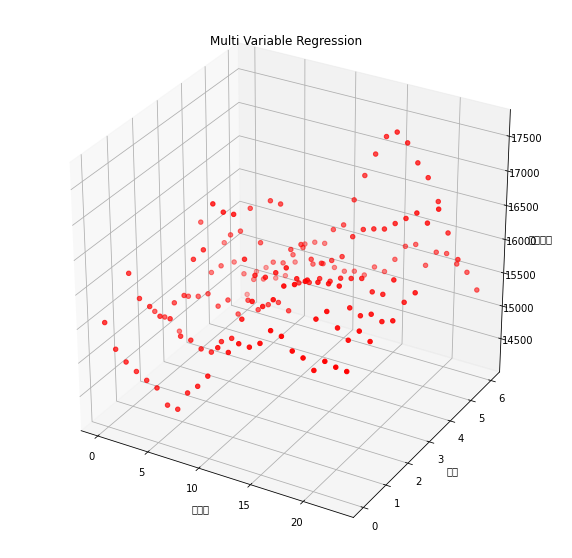

In [24]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection = '3d')
ax.set_title('Multi Variable Regression')
ax.set_xlabel('집계시')
ax.set_ylabel('요일')
ax.set_zlabel('통행시간')
plot = ax.scatter3D(x1, x2, y, c='r')
plt.show()

#4. Multi Variable을 텐서플로우 이용해서 구현해보기

In [27]:
import tensorflow as tf
import numpy as np

In [28]:
learning_rate = 1e-6
learning_epochs = 2000

In [29]:
sgd = tf.keras.optimizers.SGD(learning_rate=learning_rate)
mse = tf.keras.losses.mean_squared_error

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, input_shape=(2,)))

model.compile(loss=mse, optimizer=sgd)

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [32]:
history = model.fit(x_train, y_train, epochs=learning_epochs)

Epoch 1/2000
6/6 [==============================] - 1s 6ms/step - loss: 249354832.0000
Epoch 2/2000
6/6 [==============================] - 0s 4ms/step - loss: 248473600.0000
Epoch 3/2000
6/6 [==============================] - 0s 5ms/step - loss: 247602960.0000
Epoch 4/2000
6/6 [==============================] - 0s 4ms/step - loss: 246762688.0000
Epoch 5/2000
6/6 [==============================] - 0s 4ms/step - loss: 245904288.0000
Epoch 6/2000
6/6 [==============================] - 0s 4ms/step - loss: 245034528.0000
Epoch 7/2000
6/6 [==============================] - 0s 4ms/step - loss: 244178000.0000
Epoch 8/2000
6/6 [==============================] - 0s 4ms/step - loss: 243294016.0000
Epoch 9/2000
6/6 [==============================] - 0s 4ms/step - loss: 242461888.0000
Epoch 10/2000
6/6 [==============================] - 0s 4ms/step - loss: 241625376.0000
Epoch 11/2000
6/6 [==============================] - 0s 4ms/step - loss: 240803984.0000
Epoch 12/2000
6/6 [======================

Text(0.5, 0, 'Number of Trainning')

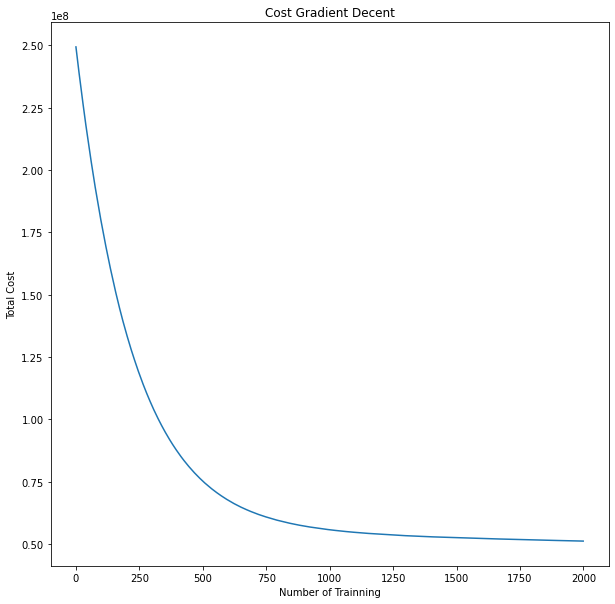

In [34]:
plt.figure(figsize=(10, 10))
plt.plot(history.history['loss'])
# 학습을 완료한 것을 history객체에 넣어놨고, 그것의 학습 수의 따른 loss를 그래프로 보여주려 한다.
plt.title('Cost Gradient Decent')
plt.ylabel('Total Cost')
plt.xlabel('Number of Trainning')

In [38]:
print('%20s %20s' % ('step', 'Cost') + '\n')
for step in range(learning_epochs):
  if step % 100 == 0: # step == 100일 때 마다 if문 실행
    cost_val = history.history['loss'][step] #  # step단계에 해당하는 학습 수에서의 loss값 저장
    print('%20i %20.5f' %(step, cost_val))

                step                 Cost

                   0      249354832.00000
                 100      178958416.00000
                 200      133978440.00000
                 300      105382960.00000
                 400       87034176.00000
                 500       75188976.00000
                 600       67535904.00000
                 700       62585320.00000
                 800       59346920.00000
                 900       57167104.00000
                1000       55702904.00000
                1100       54657860.00000
                1200       53895276.00000
                1300       53320504.00000
                1400       52876488.00000
                1500       52511684.00000
                1600       52196552.00000
                1700       51909600.00000
                1800       51641484.00000
                1900       51391592.00000


In [48]:
Time = 14 #@param {type: 'slider', min:0, max:23, step:1}
Day = 3 #@param {type: 'slider', min:0, max:6, step:1}

In [46]:
time_condition = data_out['집계시'] == Time
# 집계시들을 쭉 비교하면서 Time과 같은 것들의 행들만 쭉 나열돼서 time_condition에 저장
day_condition = data_out['요일'] == Day
# 얘도 그런 식으로 저장
data_out[time_condition & day_condition]
# time_condition, day_condition 모두 True 또는 False로 이루어진 행들이 쭉 나열되어있는 상태고 거기서 둘 다 True
# 인 거 찾아서 그것에 해당되는 리스트만 저장 

거리,집계시,요일,407
24,3,3,15236.627451


입력한 input = [Time, Day]에 대해 예측 통행시간을 구한 다음 위에서 구한 정답값과 비교해보려 함

In [49]:
input = [Time, Day]
Time = model.predict([input])
ml_time = Time[0][0]
week_days = ['월', '화', '수', '목', '금', '토', '일']
print('%10s %10s %50s' % ('집계시', '요일', '서울에서 부산까지 통행시간') + '\n')
print('%10s %10s %50s' % (str(Time), week_days[Day], str(ml_time)))

       집계시         요일                                     서울에서 부산까지 통행시간

[[14448.05]]          목                                           14448.05
